## Modèle de Deep Learning

In [2]:
X = load('X_norm_SAS10_BA_BI.joblib')
Y = load('Y.joblib')

In [6]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
from numpy.core.numeric import NaN
import tensorflow as tf
from tensorflow import keras
import random
import sklearn
from keras.callbacks import ModelCheckpoint
import os
import seaborn as sn
import math


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing

%pip install keras-tuner --upgrade
import keras_tuner as kt
from keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind


import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi 

from sklearn.preprocessing import StandardScaler, OneHotEncoder


from joblib import dump, load

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV

from sklearn.preprocessing import *
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.metrics import  make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind


import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi 

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics.cluster import adjusted_rand_score

from joblib import dump, load

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV

from sklearn.preprocessing import *
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.metrics import  make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve

In [7]:
X = load('X_norm.joblib')
Y = load('Y.joblib')

In [6]:
Y = Y['Class_2/2.5']

In [ ]:
df           = pad.read_excel('DATA_IA_CQ_Halcyon.xlsx')
list_to_drop = ['ID Patient', 'Nom du Case', 'G_2.5/2.5', 'G_3/3', 'G_2/3', 'G_2/2.5', 'G_3/2', 'ID faisceau ']
df_drop      = df.drop(list_to_drop, axis =1)
df_drop

In [ ]:
to_predict_features = ['Class_2.5/2.5', 'Class_3/3', 'Class_3/2', 'Class_2/3', 'Class_2/2.5']

Y = df_drop[to_predict_features]
X = df_drop.drop(to_predict_features, axis = 1)


In [ ]:
y = df_drop['Class_2/2.5']


In [ ]:
X_np   = np.array(X)
sc     = StandardScaler()
X_norm = sc.fit_transform(X_np)
X      = X_norm

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y['Class_2/2.5'], test_size = 0.20, random_state = 10)
X_train = StandardScaler().fit_transform(X_train)

#ros = RandomOverSampler(sampling_strategy = 'minority')
#X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [25]:
y = Y['Class_2/2.5']
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes = np.unique(y_train),   y = y_train)    
weights = dict(enumerate(class_weights))
weights 

{0: 1.1140350877192982, 1: 0.9071428571428571}

In [10]:
#pour l'utilisation de softmax:
y_train=keras.utils.to_categorical(y_train, num_classes=2, dtype=y_train.dtype)#'float32'
y_test=keras.utils.to_categorical(y_test, num_classes=2, dtype=y_train.dtype)#'float32'

### Modèle de base

In [20]:
def ANN(X_train,y_train,X_test,y_test,loss,weights,Nepochs,FBS,filepath):

  model = keras.Sequential([keras.Input(shape=(X.shape[1],)),    #format donnée entrées                   
                          keras.layers.Dense(350,kernel_regularizer="l2", activation='relu'),
                          keras.layers.Dense(325,kernel_regularizer="l2", activation='elu'),
                          keras.layers.Dense(280,kernel_regularizer="l2", activation='elu'), 
                          keras.layers.Dense(200,kernel_regularizer="l2", activation='elu'),
                          #keras.layers.Dense(150,kernel_regularizer="l2", activation='elu'),
                          #keras.layers.Dense(95,kernel_regularizer="l2", activation='elu'),
                          keras.layers.Dense(25,kernel_regularizer="l2", activation='elu'),
                          keras.layers.Dense(5,kernel_regularizer="l2", activation='elu'),
                          keras.layers.Dense(2, activation='softmax') #softmax need 2 neurons 'sigmoid'
  ]) #hard_sigmoid #

#option du modéle:
                          #keras.layers.Dense(3, activation='relu',use_bias=True,kernel_initializer='glorot_uniform',bias_initializer='zeros'
                          #,kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,bias_constraint=None),
                          #keras.layers.Dropout(0.5),
                          #keras.layers.BatchNormalization(),
                          #keras.layers.Dense(32, activation='relu'),
                          #keras.layers.Dropout(0.5),
                          #keras.layers.BatchNormalization(),
                          #keras.layers.Dense(30, activation='relu'),


  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), #Ftrl
              loss=loss,
              metrics=['AUC'])#Recall,'BinaryAccuracy',AUC


    #######create callback
 
  checkpoint = ModelCheckpoint(filepath=filepath, 
                              monitor='loss',
                              verbose=1,
                              patience=5, 
                              save_best_only=True,
                              mode='min')
  callbacks = [checkpoint]

  if weights==-1:
    history=model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs=Nepochs, batch_size=int(len(X_train)/FBS),callbacks=callbacks,verbose=0)
  else :
    history=model.fit(X_train,y_train,validation_data = (X_test,y_test), epochs=Nepochs, batch_size=int(len(X_train)/FBS),class_weight=weights,callbacks=callbacks,verbose=0)   

  
  #Load best model
  model = keras.models.load_model(filepath)  

  print(model.evaluate(X_test,y_test))

  y_preds=model.predict(X_test)
  #y_preds=np.where(y_preds > 0.5, 1,0)#test avec seuil de proba à 50%
  #y_preds=np.round(y_preds)

  #print("Classification Reports: \n", classification_report(y_test,y_preds))
  
  return y_preds,model,history


In [27]:
#Apprentissage du modéle
#(X_train,y_train,X_test,y_test,loss,weights,Nepochs,facteur Division Ndonnée Par Batch,  adresse de sauvegarde du modéle):
y_preds,model,history=ANN(X_train,y_train,X_test,y_test,'BinaryCrossentropy',weights, 1000,1,'Save_model/Checkpoint') #BinaryCrossentropy

2023-12-19 14:45:32.356150: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 14:45:32.356359: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 14:45:32.398276: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 14:45:32.398444: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 14:45:32.398589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S


Epoch 1: loss improved from inf to 9.96838, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 2: loss improved from 9.96838 to 9.93624, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 3: loss improved from 9.93624 to 9.90462, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 4: loss improved from 9.90462 to 9.87352, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 5: loss improved from 9.87352 to 9.84287, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 6: loss improved from 9.84287 to 9.81270, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 7: loss improved from 9.81270 to 9.78292, saving model to Save_model/Checkpoint
INFO:tensor


Epoch 55: loss improved from 8.57613 to 8.55255, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 56: loss improved from 8.55255 to 8.52904, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 57: loss improved from 8.52904 to 8.50560, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 58: loss improved from 8.50560 to 8.48222, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 59: loss improved from 8.48222 to 8.45891, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 60: loss improved from 8.45891 to 8.43567, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 61: loss improved from 8.43567 to 8.41249, saving model to Save_model/Checkpoint



Epoch 109: loss improved from 7.39368 to 7.37342, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 110: loss improved from 7.37342 to 7.35323, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 111: loss improved from 7.35323 to 7.33308, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 112: loss improved from 7.33308 to 7.31300, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 113: loss improved from 7.31300 to 7.29296, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 114: loss improved from 7.29296 to 7.27299, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 115: loss improved from 7.27299 to 7.25307, saving model to Save_model/Chec

INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 163: loss improved from 6.37671 to 6.35928, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 164: loss improved from 6.35928 to 6.34189, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 165: loss improved from 6.34189 to 6.32456, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 166: loss improved from 6.32456 to 6.30727, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 167: loss improved from 6.30727 to 6.29003, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 168: loss improved from 6.29003 to 6.27285, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 169: loss i

INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 217: loss improved from 5.50160 to 5.48660, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 218: loss improved from 5.48660 to 5.47165, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 219: loss improved from 5.47165 to 5.45675, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 220: loss improved from 5.45675 to 5.44188, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 221: loss improved from 5.44188 to 5.42705, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 222: loss improved from 5.42705 to 5.41228, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 223: loss i

INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 271: loss improved from 4.74944 to 4.73656, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 272: loss improved from 4.73656 to 4.72372, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 273: loss improved from 4.72372 to 4.71092, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 274: loss improved from 4.71092 to 4.69815, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 275: loss improved from 4.69815 to 4.68541, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 276: loss improved from 4.68541 to 4.67272, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 277: loss i

INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 325: loss improved from 4.10395 to 4.09291, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 326: loss improved from 4.09291 to 4.08191, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 327: loss improved from 4.08191 to 4.07093, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 328: loss improved from 4.07093 to 4.05999, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 329: loss improved from 4.05999 to 4.04908, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 330: loss improved from 4.04908 to 4.03820, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 331: loss i

INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 379: loss improved from 3.55135 to 3.54191, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 380: loss improved from 3.54191 to 3.53251, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 381: loss improved from 3.53251 to 3.52312, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 382: loss improved from 3.52312 to 3.51377, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 383: loss improved from 3.51377 to 3.50444, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 384: loss improved from 3.50444 to 3.49515, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 385: loss i

INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 433: loss improved from 3.07952 to 3.07147, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 434: loss improved from 3.07147 to 3.06345, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 435: loss improved from 3.06345 to 3.05545, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 436: loss improved from 3.05545 to 3.04747, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 437: loss improved from 3.04747 to 3.03952, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 438: loss improved from 3.03952 to 3.03160, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 439: loss i

INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 487: loss improved from 2.67777 to 2.67093, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 488: loss improved from 2.67093 to 2.66411, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 489: loss improved from 2.66411 to 2.65732, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 490: loss improved from 2.65732 to 2.65054, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 491: loss improved from 2.65054 to 2.64378, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 492: loss improved from 2.64378 to 2.63704, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 493: loss i

INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 541: loss improved from 2.33666 to 2.33086, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 542: loss improved from 2.33086 to 2.32508, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 543: loss improved from 2.32508 to 2.31931, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 544: loss improved from 2.31931 to 2.31357, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 545: loss improved from 2.31357 to 2.30784, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 546: loss improved from 2.30784 to 2.30213, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 547: loss i

INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 595: loss improved from 2.04788 to 2.04297, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 596: loss improved from 2.04297 to 2.03809, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 597: loss improved from 2.03809 to 2.03321, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 598: loss improved from 2.03321 to 2.02836, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 599: loss improved from 2.02836 to 2.02351, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 600: loss improved from 2.02351 to 2.01869, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 601: loss i

INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 649: loss improved from 1.80408 to 1.79995, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 650: loss improved from 1.79995 to 1.79583, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 651: loss improved from 1.79583 to 1.79172, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 652: loss improved from 1.79172 to 1.78763, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 653: loss improved from 1.78763 to 1.78355, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 654: loss improved from 1.78355 to 1.77948, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 655: loss i

INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 703: loss improved from 1.59890 to 1.59542, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 704: loss improved from 1.59542 to 1.59196, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 705: loss improved from 1.59196 to 1.58851, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 706: loss improved from 1.58851 to 1.58508, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 707: loss improved from 1.58508 to 1.58165, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 708: loss improved from 1.58165 to 1.57823, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 709: loss i

INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 757: loss improved from 1.42673 to 1.42383, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 758: loss improved from 1.42383 to 1.42093, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 759: loss improved from 1.42093 to 1.41804, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 760: loss improved from 1.41804 to 1.41516, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 761: loss improved from 1.41516 to 1.41229, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 762: loss improved from 1.41229 to 1.40943, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 763: loss i

INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 811: loss improved from 1.28273 to 1.28030, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 812: loss improved from 1.28030 to 1.27788, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 813: loss improved from 1.27788 to 1.27547, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 814: loss improved from 1.27547 to 1.27306, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 815: loss improved from 1.27306 to 1.27067, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 816: loss improved from 1.27067 to 1.26828, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 817: loss i

INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 865: loss improved from 1.16272 to 1.16070, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 866: loss improved from 1.16070 to 1.15869, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 867: loss improved from 1.15869 to 1.15668, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 868: loss improved from 1.15668 to 1.15468, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 869: loss improved from 1.15468 to 1.15269, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 870: loss improved from 1.15269 to 1.15070, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 871: loss i

INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 919: loss improved from 1.06298 to 1.06131, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 920: loss improved from 1.06131 to 1.05964, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 921: loss improved from 1.05964 to 1.05797, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 922: loss improved from 1.05797 to 1.05631, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 923: loss improved from 1.05631 to 1.05466, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 924: loss improved from 1.05466 to 1.05301, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 925: loss i

INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 973: loss improved from 0.98036 to 0.97897, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 974: loss improved from 0.97897 to 0.97758, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 975: loss improved from 0.97758 to 0.97621, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 976: loss improved from 0.97621 to 0.97484, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 977: loss improved from 0.97484 to 0.97347, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 978: loss improved from 0.97347 to 0.97211, saving model to Save_model/Checkpoint
INFO:tensorflow:Assets written to: Save_model/Checkpoint/assets

Epoch 979: loss i

In [28]:
y_preds = model.predict(X_test)
y_preds = y_preds[:,1]

2/2 [==============================] - 0s 2ms/step


In [31]:
y_preds=np.where(y_preds > 0.179135, 1,0)

In [32]:
y_preds

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

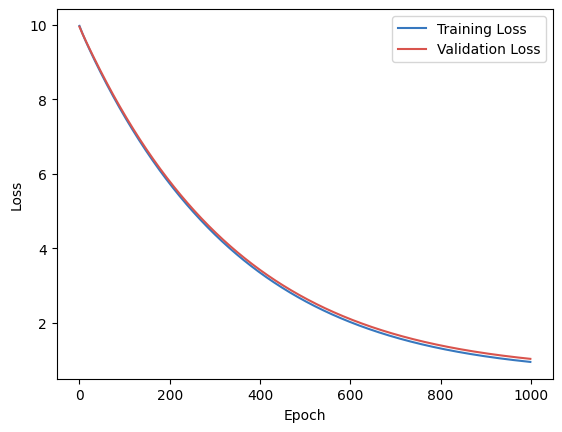

KeyError: 'binary_accuracy'

In [34]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

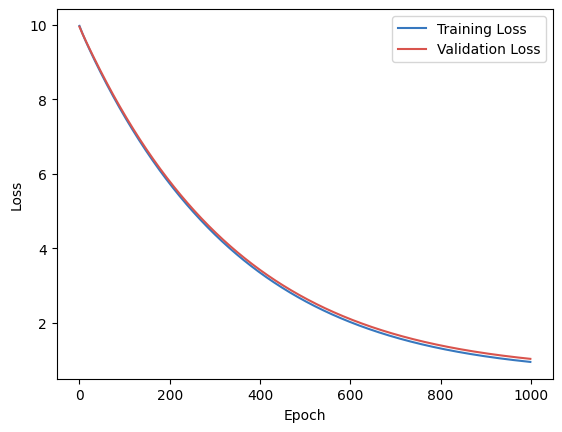

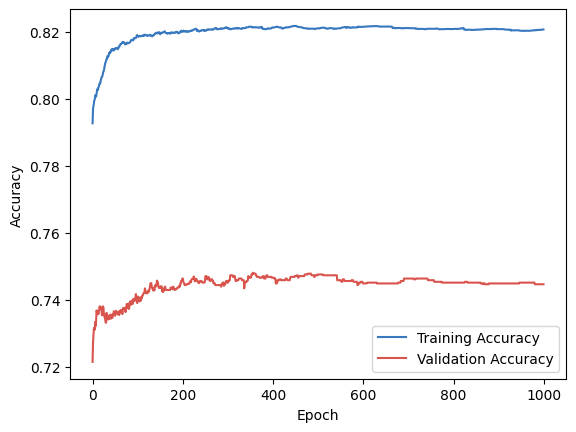

In [35]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['auc'], label='Training Accuracy')
plt.plot(history.history['val_auc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y

In [ ]:
yhat = model.predict(X_test)

In [ ]:
yhat[:,1]

In [ ]:
 yhat=np.where(yhat > 0.5, 1,0)

In [ ]:
yhat

2/2 [==============================] - 0s 1ms/step
Best Threshold=0.179135, G-Mean=0.672
AUC=0.750739


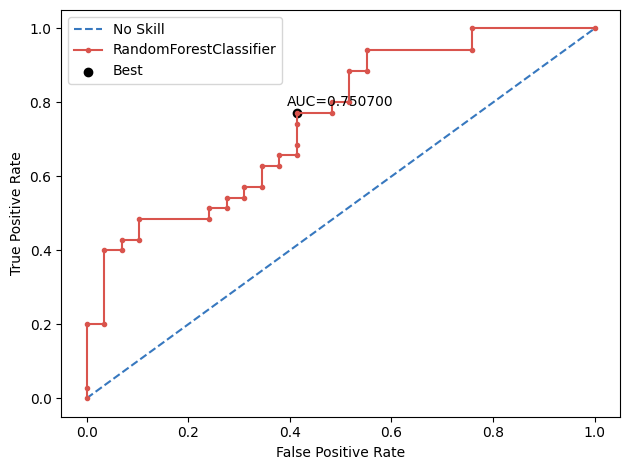

In [30]:
y = y_test
y = y[:,1]
yhat = model.predict(X_test)
yhat = yhat[:,1]

from numpy import argmax
from numpy import sqrt

#yhat = model_rfc.predict_proba(X)
# keep probabilities for the positive outcome only
#yhat = yhat[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
auc = roc_auc_score(y, yhat)
print('AUC=%f' %auc)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='RandomForestClassifier')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.text(0.5,0.8,'AUC=%f' %round(auc,4) ,horizontalalignment='center',
     verticalalignment='center', fontsize=10, color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.tight_layout()

plt.savefig("ROC rfc toutes localisations", dpi=400)
plt.show()

In [ ]:
y_preds=np.where(yhat > 0.342173, 1,0)

In [ ]:
yhat2 = model.predict(X_test)

In [ ]:
yhat = yhat2[:,1]

In [ ]:
import tensorflow as tf
import seaborn as sns
#pred = model.predict(inputs[test])
conf_matrix_SGD_01 = tf.math.confusion_matrix(labels=y_test, predictions=y_preds)
 
ax_sgd_01 = sns.heatmap(conf_matrix_SGD_01, annot = True, fmt='d')
ax_sgd_01.set_title('Matrice de confusion s = 0.90')
ax_sgd_01.set_ylabel('Réel')
ax_sgd_01.set_xlabel('Prédiction')
#plt.savefig("Matrice de confusion svc toutes localisations", dpi=400)
plt.show()


### Modèle avec optimisation des hp

In [ ]:
X = load('X_norm.joblib')
Y = load('Y.joblib')

In [13]:
X = load('X_norm_SAS10_BA_BI.joblib')
Y = load('Y.joblib')

In [9]:
Y.shape

(318, 5)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,Y['Class_2/2.5'], test_size = 0.20, random_state = 10)
X_train = StandardScaler().fit_transform(X_train)

#ros = RandomOverSampler(sampling_strategy = 'minority')
#X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [15]:
#pour l'utilisation de softmax:
y_train=keras.utils.to_categorical(y_train, num_classes=2, dtype=y_train.dtype)#'float32'
y_test=keras.utils.to_categorical(y_test, num_classes=2, dtype=y_train.dtype)#'float32'

In [16]:
#Importation des librairies
import os
import csv
import numpy as np
import tensorflow
#import keras
import keras_tuner
import pydicom
from pydicom import dcmread
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import Accuracy, BinaryAccuracy, Precision, Recall, AUC #F1Score
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [11]:
def create_model(hp):
    model = keras.Sequential([keras.Input(shape=(X.shape[1],)),
                              Dense(hp.Choice('dense_units1', [512, 1024, 2048, 4096]), activation=hp.Choice("activation1", ["elu","gelu","relu","selu"])),
                              Dense(hp.Choice('dense_units2', [512, 1024, 2048, 4096]), activation=hp.Choice("activation2", ["elu","gelu","relu","selu"])),
                              Dense(hp.Choice('dense_units3', [512, 1024, 2048, 4096]), activation=hp.Choice("activation3", ["elu","gelu","relu","selu"])),                              
    #model = Dropout(rate=hp.Choice('dropout1', values=[0.0, 0.2, 0.5, 0.8]))(model)
    #model = Dense(hp.Choice('dense_units12', [512, 1024, 2048, 4096]), activation=hp.Choice("activation2", ["elu","gelu","relu","selu"]))(model)
    #model = Dropout(rate=hp.Choice('dropout2', values=[0.0, 0.2, 0.5, 0.8]))(model)
                              Dense(2, activation='softmax')])
    #predictions = Dense(1, activation='sigmoid')(model)
    #model = Model(inputs=base_model.input, outputs=predictions,)
    #model.summary()
    metrics = [BinaryAccuracy(),Precision(name='precision'),Recall(name='recall'),AUC()] #F1Score()
    
    #model.summary(
    optimizer=hp.Choice('optimizer',[True,False])
    if optimizer:
        opt=Adam()
    else:
        opt=SGD(learning_rate=1e-4)
        
    model.compile(optimizer=opt,loss='binary_crossentropy', metrics = metrics)
    
    return model

#tuner = keras_tuner.RandomSearch(
#    create_model,
#    objective='val_binary_accuracy', #loss
#    max_trials=101)

#tuner.search(train_X, train_y, epochs=50, validation_data=(validation_X, validation_y)) #augmenter epoch à l'avenir

tuner3 = keras_tuner.RandomSearch(
    create_model,
    objective='val_binary_accuracy', #loss
    max_trials=300)

tuner3.search(X_train, y_train, epochs=10000, batch_size=len(y_train), validation_data=(X_test, y_test))

Trial 300 Complete [00h 04m 04s]
val_binary_accuracy: 0.71875

Best val_binary_accuracy So Far: 0.859375
Total elapsed time: 18h 29m 43s


### Test avec "Objective" = AUC metric

In [ ]:
def create_model(hp):
    model = keras.Sequential([keras.Input(shape=(X.shape[1],)),
                              Dense(hp.Choice('dense_units1', [512, 1024, 2048, 4096]), activation=hp.Choice("activation1", ["elu","gelu","relu","selu"])),
                              Dense(hp.Choice('dense_units2', [512, 1024, 2048, 4096]), activation=hp.Choice("activation2", ["elu","gelu","relu","selu"])),
                              Dense(hp.Choice('dense_units3', [512, 1024, 2048, 4096]), activation=hp.Choice("activation3", ["elu","gelu","relu","selu"])),                              
    #model = Dropout(rate=hp.Choice('dropout1', values=[0.0, 0.2, 0.5, 0.8]))(model)
    #model = Dense(hp.Choice('dense_units12', [512, 1024, 2048, 4096]), activation=hp.Choice("activation2", ["elu","gelu","relu","selu"]))(model)
    #model = Dropout(rate=hp.Choice('dropout2', values=[0.0, 0.2, 0.5, 0.8]))(model)
                              Dense(2, activation='softmax')])
    #predictions = Dense(1, activation='sigmoid')(model)
    #model = Model(inputs=base_model.input, outputs=predictions,)
    #model.summary()
    metrics = [BinaryAccuracy(),Precision(name='precision'),Recall(name='recall'),AUC()] #F1Score()
    
    #model.summary(
    optimizer=hp.Choice('optimizer',[True,False])
    if optimizer:
        opt=Adam()
    else:
        opt=SGD(learning_rate=1e-4)
        
    model.compile(optimizer=opt,loss='binary_crossentropy', metrics = metrics)
    
    return model

#tuner = keras_tuner.RandomSearch(
#    create_model,
#    objective='val_binary_accuracy', #loss
#    max_trials=101)

#tuner.search(train_X, train_y, epochs=50, validation_data=(validation_X, validation_y)) #augmenter epoch à l'avenir

tuner3 = keras_tuner.RandomSearch(
    create_model,
    objective='AUC', #loss
    max_trials=300)

tuner3.search(X_train, y_train, epochs=10000, batch_size=len(y_train), validation_data=(X_test, y_test))

In [12]:
best_model = tuner3.get_best_models()[0]
best_model.summary()
best_hp=tuner3.get_best_hyperparameters()[0]
print(best_hp.values)

print(best_model.history)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2048      
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dense_2 (Dense)             (None, 4096)              4198400   
                                                                 
 dense_3 (Dense)             (None, 2)                 8194      
                                                                 
Total params: 4,733,954
Trainable params: 4,733,954
Non-trainable params: 0
_________________________________________________________________
{'dense_units1': 512, 'activation1': 'elu', 'dense_units2': 1024, 'activation2': 'selu', 'dense_units3': 4096, 'activation3': 'relu', 'optimizer': 1}
None


In [13]:
dump(best_model, 'Best_model_hpchoice_21122023.joblib')

INFO:tensorflow:Assets written to: ram://d1d769dd-5875-4eda-97bc-2188c97adcff/assets


['Best_model_hpchoice_21122023.joblib']

In [ ]:
best_model = load('Best_model_hpchoice_19122023.joblib')

In [18]:
preds = best_model.predict(X)

10/10 [==============================] - 1s 943us/step


2024-01-10 12:18:31.460944: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [19]:
preds

array([[1.00000000e+00, 7.90602972e-10],
       [7.72546264e-05, 9.99922752e-01],
       [5.86254309e-11, 1.00000000e+00],
       [5.86254309e-11, 1.00000000e+00],
       [4.74408083e-27, 1.00000000e+00],
       [2.50922447e-18, 1.00000000e+00],
       [4.87991300e-14, 1.00000000e+00],
       [8.42309930e-22, 1.00000000e+00],
       [7.33136169e-29, 1.00000000e+00],
       [1.00000000e+00, 7.37510400e-11],
       [1.00000000e+00, 7.37510400e-11],
       [1.00000000e+00, 7.37632089e-09],
       [1.00000000e+00, 7.37632089e-09],
       [5.36639236e-05, 9.99946356e-01],
       [4.65458423e-01, 5.34541547e-01],
       [1.00000000e+00, 1.89535720e-09],
       [9.99999285e-01, 7.35392405e-07],
       [9.99999762e-01, 1.80543964e-07],
       [4.42837390e-13, 1.00000000e+00],
       [2.75396630e-08, 1.00000000e+00],
       [3.73316950e-21, 1.00000000e+00],
       [9.99927640e-01, 7.23425910e-05],
       [7.50072360e-01, 2.49927685e-01],
       [9.92312133e-01, 7.68790953e-03],
       [9.999998

In [20]:
Y = Y['Class_2/2.5']

In [ ]:
custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black"] 
sns.set_palette(custom_palette)

10/10 [==============================] - 0s 1ms/step
Best Threshold=0.755651, G-Mean=0.943
AUC=0.967093


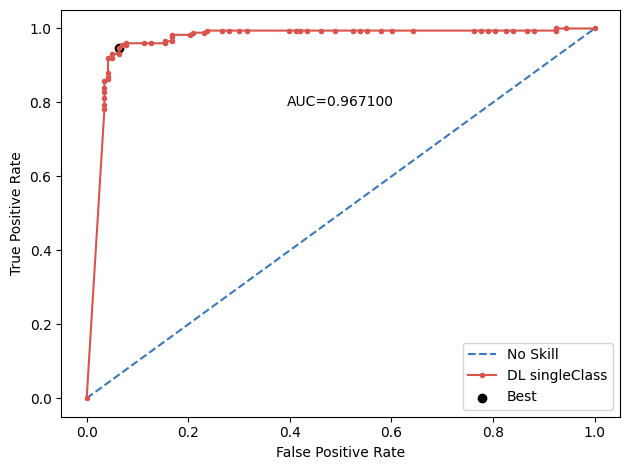

In [25]:
y = Y
#y = y[:,1]
yhat = best_model.predict(X)
yhat = yhat[:,1]

from numpy import argmax
from numpy import sqrt

#yhat = model_rfc.predict_proba(X)
# keep probabilities for the positive outcome only
#yhat = yhat[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
auc = roc_auc_score(y, yhat)
print('AUC=%f' %auc)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='DL singleClass')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.text(0.5,0.8,'AUC=%f' %round(auc,4) ,horizontalalignment='center',
     verticalalignment='center', fontsize=10, color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.tight_layout()

plt.savefig("DL one class", dpi=400)
plt.show()

In [15]:
threshold = 0.755651

In [17]:
pred_seuil = np.transpose(np.where(yhat>threshold,1,0))
print(pred_seuil)
print(y)
print(*pred_seuil)
print(*(pred_seuil-y))
print(np.sum((pred_seuil-y)==np.zeros(pred_seuil.shape))," bien classées avec seuil = ", threshold, "sur ", pred_seuil.shape[0])

[0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1
 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0
 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0
 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1]
0      0
1      1
2      1
3      1
4      1
      ..
313    1
314    0
315    0
316    1
317    1
Name: Class_2/2.5, Length: 318, dtype: int64
0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 

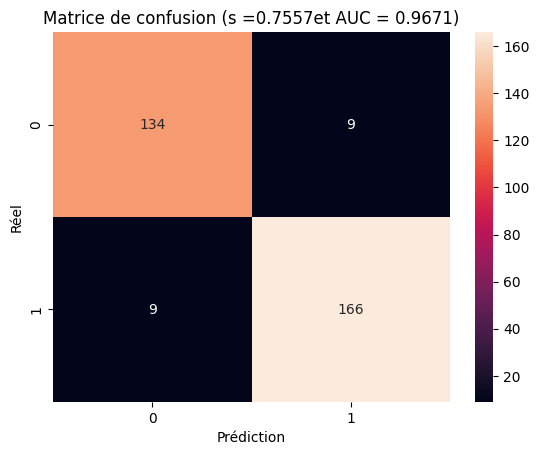

In [26]:
conf_matrix_SGD_01 = tensorflow.math.confusion_matrix(labels=y, predictions=np.transpose(pred_seuil))
ax_sgd_01 = sns.heatmap(conf_matrix_SGD_01, annot = True, fmt='d')
ax_sgd_01.set_title('Matrice de confusion (s =' + str(round(threshold,4)) + 'et AUC = ' + str(round(auc,4))+")")
ax_sgd_01.set_ylabel('Réel')
ax_sgd_01.set_xlabel('Prédiction')
plt.savefig("Matrice de confusion Deep Learning toutes localisations -- SAS-BA-BI", dpi=400)
plt.show()

In [29]:
TP = 134
TN = 166
FP = 9
FN = 9
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print("sensitivity = " + str(sensitivity))
print("specificity = " + str(specificity))

sensitivity = 0.9370629370629371
specificity = 0.9485714285714286


In [ ]:
pred_seuil = np.transpose(np.where(yhat>threshold,1,0))
print(pred_seuil)
print(y_test[:,1])
print(*pred_seuil)
print(*(pred_seuil-y_test[:,1]))
print(np.sum((pred_seuil-y_test[:,1])==np.zeros(pred_seuil.shape))," bien classées avec seuil = ", threshold, "sur ", pred_seuil.shape[0])

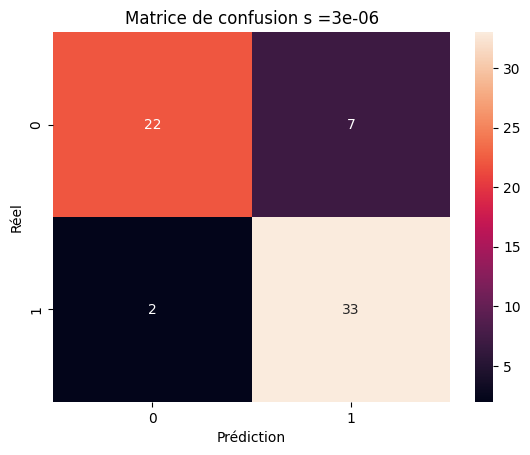

In [93]:
conf_matrix_SGD_01 = tensorflow.math.confusion_matrix(labels=y_test[:,1], predictions=np.transpose(pred_seuil))
ax_sgd_01 = sns.heatmap(conf_matrix_SGD_01, annot = True, fmt='d')
ax_sgd_01.set_title('Matrice de confusion s =' + str(threshold))
ax_sgd_01.set_ylabel('Réel')
ax_sgd_01.set_xlabel('Prédiction')
#plt.savefig("Matrice de confusion svc toutes localisations", dpi=400)
plt.show()

### Modèle de prédiction des différents critères gamma

In [ ]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind


import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi 

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics.cluster import adjusted_rand_score

from joblib import dump, load

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV

from sklearn.preprocessing import *
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.metrics import  make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve

#Importation des librairies
import os
import csv
import numpy as np
import tensorflow
#import keras
import keras_tuner
import pydicom
from pydicom import dcmread
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import Accuracy, BinaryAccuracy, Precision, Recall, AUC #F1Score
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
from numpy.core.numeric import NaN
import tensorflow as tf
from tensorflow import keras
import random
import sklearn
from keras.callbacks import ModelCheckpoint
import os
import seaborn as sn
import math


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing

%pip install keras-tuner --upgrade
import keras_tuner as kt
from keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

#a regarder:https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

In [76]:
X = load('X_norm_SAS10_BA_BI.joblib')
Y = load('Y.joblib')

In [45]:
Y

,Class_2.5/2.5,Class_3/3,Class_3/2,Class_2/3,Class_2/2.5
0,0,1,0,1,0
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1
...,...,...,...,...,...
313,1,1,1,1,1
314,0,1,0,1,0
315,0,1,0,1,0
316,1,1,1,1,1


In [46]:
y_np = np.asarray(Y)

In [5]:
y_np

array([[0, 1, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       ...,
       [0, 1, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y_np, test_size = 0.20, random_state = 10)

#ros = RandomOverSampler(sampling_strategy = 'minority')
#X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [19]:
#pour l'utilisation de softmax:
#y_train=keras.utils.to_categorical(y_train, num_classes=5, dtype=y_train.dtype)#'float32'
#y_test=keras.utils.to_categorical(y_test, num_classes=5, dtype=y_train.dtype)#'float32'

In [12]:
def ANN(X_train,y_train,X_test,y_test,loss,Nepochs,FBS,filepath):

  model = keras.Sequential([keras.Input(shape=(X.shape[1],)),    #format donnée entrées                   
                          keras.layers.Dense(350,kernel_regularizer="l2", activation='relu'),
                          keras.layers.Dense(325,kernel_regularizer="l2", activation='elu'),
                          keras.layers.Dense(280,kernel_regularizer="l2", activation='elu'), 
                          keras.layers.Dense(200,kernel_regularizer="l2", activation='elu'),
                          #keras.layers.Dense(150,kernel_regularizer="l2", activation='elu'),
                          #keras.layers.Dense(95,kernel_regularizer="l2", activation='elu'),
                          keras.layers.Dense(25,kernel_regularizer="l2", activation='elu'),
                          keras.layers.Dense(5,kernel_regularizer="l2", activation='elu'),
                          keras.layers.Dense(5, activation='softmax') #softmax need 2 neurons 'sigmoid'
  ]) #hard_sigmoid #

#option du modéle:
                          #keras.layers.Dense(3, activation='relu',use_bias=True,kernel_initializer='glorot_uniform',bias_initializer='zeros'
                          #,kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,bias_constraint=None),
                          #keras.layers.Dropout(0.5),
                          #keras.layers.BatchNormalization(),
                          #keras.layers.Dense(32, activation='relu'),
                          #keras.layers.Dropout(0.5),
                          #keras.layers.BatchNormalization(),
                          #keras.layers.Dense(30, activation='relu'),


  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), #Ftrl
              loss=loss,
              metrics=['AUC'])#Recall,'BinaryAccuracy',AUC


    #######create callback
 
  checkpoint = ModelCheckpoint(filepath=filepath, 
                              monitor='loss',
                              verbose=1,
                              patience=5, 
                              save_best_only=True,
                              mode='min')
  callbacks = [checkpoint]

  history=model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs=Nepochs, batch_size=int(len(X_train)/FBS),callbacks=callbacks,verbose=0)

  
  #Load best model
  model = keras.models.load_model(filepath)  

  print(model.evaluate(X_test,y_test))

  y_preds=model.predict(X_test)
  #y_preds=np.where(y_preds > 0.5, 1,0)#test avec seuil de proba à 50%
  #y_preds=np.round(y_preds)

  #print("Classification Reports: \n", classification_report(y_test,y_preds))
  
  return y_preds,model,history


### Sigmoid pour ne pas avoir la somme des probabilités = 1

In [60]:
def ANN(X_train,y_train,X_test,y_test,loss,Nepochs,FBS,filepath):

  model = keras.Sequential([keras.Input(shape=(X.shape[1],)),    #format donnée entrées                   
                          keras.layers.Dense(350,kernel_regularizer="l2", activation='relu'),
                          keras.layers.Dense(325,kernel_regularizer="l2", activation='elu'),
                          keras.layers.Dense(280,kernel_regularizer="l2", activation='elu'), 
                          keras.layers.Dense(200,kernel_regularizer="l2", activation='elu'),
                          #keras.layers.Dense(150,kernel_regularizer="l2", activation='elu'),
                          #keras.layers.Dense(95,kernel_regularizer="l2", activation='elu'),
                          keras.layers.Dense(25,kernel_regularizer="l2", activation='elu'),
                          keras.layers.Dense(5,kernel_regularizer="l2", activation='elu'),
                          keras.layers.Dense(5, activation='sigmoid') #softmax need 2 neurons 'sigmoid'
  ]) #hard_sigmoid #

#option du modéle:
                          #keras.layers.Dense(3, activation='relu',use_bias=True,kernel_initializer='glorot_uniform',bias_initializer='zeros'
                          #,kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,bias_constraint=None),
                          #keras.layers.Dropout(0.5),
                          #keras.layers.BatchNormalization(),
                          #keras.layers.Dense(32, activation='relu'),
                          #keras.layers.Dropout(0.5),
                          #keras.layers.BatchNormalization(),
                          #keras.layers.Dense(30, activation='relu'),


  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), #Ftrl
              loss=loss,
              metrics=['AUC'])#Recall,'BinaryAccuracy',AUC


    #######create callback
 
  checkpoint = ModelCheckpoint(filepath=filepath, 
                              monitor='loss',
                              verbose=1,
                              patience=5, 
                              save_best_only=True,
                              mode='min')
  callbacks = [checkpoint]

  history=model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs=Nepochs, batch_size=int(len(X_train)/FBS),callbacks=callbacks,verbose=0)

  
  #Load best model
  model = keras.models.load_model(filepath)  

  print(model.evaluate(X_test,y_test))

  y_preds=model.predict(X_test)
  #y_preds=np.where(y_preds > 0.5, 1,0)#test avec seuil de proba à 50%
  #y_preds=np.round(y_preds)

  #print("Classification Reports: \n", classification_report(y_test,y_preds))
  
  return y_preds,model,history


In [64]:
#Apprentissage du modéle
#(X_train,y_train,X_test,y_test,loss,weights,Nepochs,facteur Division Ndonnée Par Batch,  adresse de sauvegarde du modéle):
y_preds,model,history=ANN(X_train,y_train,X_test,y_test,'BinaryCrossentropy',3000,1,'Save_model_multiclass/Checkpoint') #BinaryCrossentropy


Epoch 1: loss improved from inf to 9.97714, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2: loss improved from 9.97714 to 9.94589, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 3: loss improved from 9.94589 to 9.91502, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 4: loss improved from 9.91502 to 9.88451, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 5: loss improved from 9.88451 to 9.85438, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 6: loss improved from 9.85438 to 9.82459, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_m

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 49: loss improved from 8.71824 to 8.69388, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 50: loss improved from 8.69388 to 8.66959, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 51: loss improved from 8.66959 to 8.64538, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 52: loss improved from 8.64538 to 8.62124, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 53: loss improved from 8.62124 to 8.59717, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 54: loss improved from 8.59717 to 8.57317, savin


Epoch 96: loss improved from 7.64709 to 7.62583, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 97: loss improved from 7.62583 to 7.60464, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 98: loss improved from 7.60464 to 7.58351, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 99: loss improved from 7.58351 to 7.56244, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 100: loss improved from 7.56244 to 7.54142, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 101: loss improved from 7.54142 to 7.52047, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets writte


Epoch 143: loss improved from 6.71030 to 6.69168, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 144: loss improved from 6.69168 to 6.67312, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 145: loss improved from 6.67312 to 6.65460, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 146: loss improved from 6.65460 to 6.63614, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 147: loss improved from 6.63614 to 6.61773, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 148: loss improved from 6.61773 to 6.59937, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 190: loss improved from 5.88915 to 5.87282, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 191: loss improved from 5.87282 to 5.85654, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 192: loss improved from 5.85654 to 5.84031, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 193: loss improved from 5.84031 to 5.82412, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 194: loss improved from 5.82412 to 5.80798, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 195: loss improved from 5.80798 to 5.79187, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 237: loss improved from 5.16929 to 5.15498, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 238: loss improved from 5.15498 to 5.14071, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 239: loss improved from 5.14071 to 5.12649, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 240: loss improved from 5.12649 to 5.11231, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 241: loss improved from 5.11231 to 5.09816, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 242: loss improved from 5.09816 to 5.08405, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 284: loss improved from 4.53875 to 4.52622, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 285: loss improved from 4.52622 to 4.51373, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 286: loss improved from 4.51373 to 4.50128, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 287: loss improved from 4.50128 to 4.48887, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 288: loss improved from 4.48887 to 4.47648, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 289: loss improved from 4.47648 to 4.46413, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 331: loss improved from 3.98713 to 3.97618, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 332: loss improved from 3.97618 to 3.96527, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 333: loss improved from 3.96527 to 3.95438, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 334: loss improved from 3.95438 to 3.94353, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 335: loss improved from 3.94353 to 3.93271, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 336: loss improved from 3.93271 to 3.92192, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 378: loss improved from 3.50548 to 3.49594, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 379: loss improved from 3.49594 to 3.48642, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 380: loss improved from 3.48642 to 3.47692, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 381: loss improved from 3.47692 to 3.46746, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 382: loss improved from 3.46746 to 3.45802, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 383: loss improved from 3.45802 to 3.44861, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 425: loss improved from 3.08571 to 3.07739, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 426: loss improved from 3.07739 to 3.06910, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 427: loss improved from 3.06910 to 3.06084, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 428: loss improved from 3.06084 to 3.05260, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 429: loss improved from 3.05260 to 3.04438, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 430: loss improved from 3.04438 to 3.03619, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 472: loss improved from 2.72046 to 2.71324, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 473: loss improved from 2.71324 to 2.70603, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 474: loss improved from 2.70603 to 2.69885, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 475: loss improved from 2.69885 to 2.69168, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 476: loss improved from 2.69168 to 2.68454, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 477: loss improved from 2.68454 to 2.67742, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 519: loss improved from 2.40324 to 2.39697, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 520: loss improved from 2.39697 to 2.39072, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 521: loss improved from 2.39072 to 2.38448, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 522: loss improved from 2.38448 to 2.37827, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 523: loss improved from 2.37827 to 2.37207, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 524: loss improved from 2.37207 to 2.36590, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 566: loss improved from 2.12823 to 2.12280, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 567: loss improved from 2.12280 to 2.11739, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 568: loss improved from 2.11739 to 2.11199, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 569: loss improved from 2.11199 to 2.10661, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 570: loss improved from 2.10661 to 2.10124, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 571: loss improved from 2.10124 to 2.09590, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 613: loss improved from 1.89025 to 1.88556, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 614: loss improved from 1.88556 to 1.88088, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 615: loss improved from 1.88088 to 1.87621, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 616: loss improved from 1.87621 to 1.87156, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 617: loss improved from 1.87156 to 1.86692, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 618: loss improved from 1.86692 to 1.86230, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 660: loss improved from 1.68472 to 1.68067, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 661: loss improved from 1.68067 to 1.67663, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 662: loss improved from 1.67663 to 1.67260, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 663: loss improved from 1.67260 to 1.66859, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 664: loss improved from 1.66859 to 1.66459, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 665: loss improved from 1.66459 to 1.66060, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 707: loss improved from 1.50754 to 1.50405, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 708: loss improved from 1.50405 to 1.50057, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 709: loss improved from 1.50057 to 1.49710, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 710: loss improved from 1.49710 to 1.49365, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 711: loss improved from 1.49365 to 1.49020, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 712: loss improved from 1.49020 to 1.48677, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 754: loss improved from 1.35509 to 1.35209, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 755: loss improved from 1.35209 to 1.34910, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 756: loss improved from 1.34910 to 1.34612, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 757: loss improved from 1.34612 to 1.34315, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 758: loss improved from 1.34315 to 1.34019, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 759: loss improved from 1.34019 to 1.33724, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 801: loss improved from 1.22418 to 1.22160, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 802: loss improved from 1.22160 to 1.21904, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 803: loss improved from 1.21904 to 1.21648, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 804: loss improved from 1.21648 to 1.21394, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 805: loss improved from 1.21394 to 1.21140, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 806: loss improved from 1.21140 to 1.20887, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 848: loss improved from 1.11196 to 1.10975, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 849: loss improved from 1.10975 to 1.10756, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 850: loss improved from 1.10756 to 1.10537, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 851: loss improved from 1.10537 to 1.10318, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 852: loss improved from 1.10318 to 1.10101, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 853: loss improved from 1.10101 to 1.09884, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 895: loss improved from 1.01593 to 1.01404, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 896: loss improved from 1.01404 to 1.01217, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 897: loss improved from 1.01217 to 1.01030, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 898: loss improved from 1.01030 to 1.00843, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 899: loss improved from 1.00843 to 1.00657, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 900: loss improved from 1.00657 to 1.00472, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 942: loss improved from 0.93390 to 0.93229, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 943: loss improved from 0.93229 to 0.93069, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 944: loss improved from 0.93069 to 0.92909, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 945: loss improved from 0.92909 to 0.92750, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 946: loss improved from 0.92750 to 0.92592, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 947: loss improved from 0.92592 to 0.92433, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 989: loss improved from 0.86394 to 0.86257, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 990: loss improved from 0.86257 to 0.86120, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 991: loss improved from 0.86120 to 0.85984, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 992: loss improved from 0.85984 to 0.85848, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 993: loss improved from 0.85848 to 0.85713, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 994: loss improved from 0.85713 to 0.85579, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets wr


Epoch 1036: loss improved from 0.80436 to 0.80319, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1037: loss improved from 0.80319 to 0.80203, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1038: loss improved from 0.80203 to 0.80087, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1039: loss improved from 0.80087 to 0.79972, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1040: loss improved from 0.79972 to 0.79857, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1041: loss improved from 0.79857 to 0.79742, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Ass

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1083: loss improved from 0.75369 to 0.75270, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1084: loss improved from 0.75270 to 0.75171, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1085: loss improved from 0.75171 to 0.75073, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1086: loss improved from 0.75073 to 0.74974, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1087: loss improved from 0.74974 to 0.74877, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1088: loss improved from 0.74877 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1130: loss improved from 0.71062 to 0.70978, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1131: loss improved from 0.70978 to 0.70894, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1132: loss improved from 0.70894 to 0.70811, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1133: loss improved from 0.70811 to 0.70727, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1134: loss improved from 0.70727 to 0.70644, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1135: loss improved from 0.70644 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1177: loss improved from 0.67405 to 0.67333, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1178: loss improved from 0.67333 to 0.67262, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1179: loss improved from 0.67262 to 0.67191, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1180: loss improved from 0.67191 to 0.67120, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1181: loss improved from 0.67120 to 0.67049, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1182: loss improved from 0.67049 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1224: loss improved from 0.64300 to 0.64239, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1225: loss improved from 0.64239 to 0.64179, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1226: loss improved from 0.64179 to 0.64119, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1227: loss improved from 0.64119 to 0.64059, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1228: loss improved from 0.64059 to 0.63999, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1229: loss improved from 0.63999 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1271: loss improved from 0.61665 to 0.61614, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1272: loss improved from 0.61614 to 0.61562, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1273: loss improved from 0.61562 to 0.61511, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1274: loss improved from 0.61511 to 0.61460, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1275: loss improved from 0.61460 to 0.61409, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1276: loss improved from 0.61409 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1318: loss improved from 0.59427 to 0.59384, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1319: loss improved from 0.59384 to 0.59340, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1320: loss improved from 0.59340 to 0.59297, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1321: loss improved from 0.59297 to 0.59253, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1322: loss improved from 0.59253 to 0.59210, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1323: loss improved from 0.59210 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1365: loss improved from 0.57525 to 0.57488, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1366: loss improved from 0.57488 to 0.57451, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1367: loss improved from 0.57451 to 0.57414, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1368: loss improved from 0.57414 to 0.57377, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1369: loss improved from 0.57377 to 0.57340, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1370: loss improved from 0.57340 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1412: loss improved from 0.55906 to 0.55874, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1413: loss improved from 0.55874 to 0.55842, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1414: loss improved from 0.55842 to 0.55811, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1415: loss improved from 0.55811 to 0.55780, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1416: loss improved from 0.55780 to 0.55748, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1417: loss improved from 0.55748 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1459: loss improved from 0.54524 to 0.54497, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1460: loss improved from 0.54497 to 0.54470, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1461: loss improved from 0.54470 to 0.54443, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1462: loss improved from 0.54443 to 0.54417, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1463: loss improved from 0.54417 to 0.54390, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1464: loss improved from 0.54390 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1506: loss improved from 0.53343 to 0.53320, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1507: loss improved from 0.53320 to 0.53297, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1508: loss improved from 0.53297 to 0.53274, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1509: loss improved from 0.53274 to 0.53251, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1510: loss improved from 0.53251 to 0.53228, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1511: loss improved from 0.53228 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1553: loss improved from 0.52331 to 0.52311, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1554: loss improved from 0.52311 to 0.52291, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1555: loss improved from 0.52291 to 0.52271, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1556: loss improved from 0.52271 to 0.52251, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1557: loss improved from 0.52251 to 0.52232, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1558: loss improved from 0.52232 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1600: loss improved from 0.51459 to 0.51442, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1601: loss improved from 0.51442 to 0.51425, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1602: loss improved from 0.51425 to 0.51408, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1603: loss improved from 0.51408 to 0.51391, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1604: loss improved from 0.51391 to 0.51374, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1605: loss improved from 0.51374 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1647: loss improved from 0.50705 to 0.50690, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1648: loss improved from 0.50690 to 0.50675, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1649: loss improved from 0.50675 to 0.50660, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1650: loss improved from 0.50660 to 0.50646, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1651: loss improved from 0.50646 to 0.50631, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1652: loss improved from 0.50631 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1694: loss improved from 0.50050 to 0.50037, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1695: loss improved from 0.50037 to 0.50024, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1696: loss improved from 0.50024 to 0.50011, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1697: loss improved from 0.50011 to 0.49998, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1698: loss improved from 0.49998 to 0.49985, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1699: loss improved from 0.49985 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1741: loss improved from 0.49477 to 0.49465, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1742: loss improved from 0.49465 to 0.49454, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1743: loss improved from 0.49454 to 0.49442, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1744: loss improved from 0.49442 to 0.49431, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1745: loss improved from 0.49431 to 0.49420, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1746: loss improved from 0.49420 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1788: loss improved from 0.48972 to 0.48962, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1789: loss improved from 0.48962 to 0.48952, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1790: loss improved from 0.48952 to 0.48942, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1791: loss improved from 0.48942 to 0.48932, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1792: loss improved from 0.48932 to 0.48922, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1793: loss improved from 0.48922 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1835: loss improved from 0.48526 to 0.48517, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1836: loss improved from 0.48517 to 0.48508, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1837: loss improved from 0.48508 to 0.48499, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1838: loss improved from 0.48499 to 0.48490, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1839: loss improved from 0.48490 to 0.48481, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1840: loss improved from 0.48481 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1882: loss improved from 0.48128 to 0.48119, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1883: loss improved from 0.48119 to 0.48112, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1884: loss improved from 0.48112 to 0.48104, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1885: loss improved from 0.48104 to 0.48096, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1886: loss improved from 0.48096 to 0.48088, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1887: loss improved from 0.48088 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1929: loss improved from 0.47770 to 0.47763, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1930: loss improved from 0.47763 to 0.47756, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1931: loss improved from 0.47756 to 0.47749, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1932: loss improved from 0.47749 to 0.47741, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1933: loss improved from 0.47741 to 0.47734, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1934: loss improved from 0.47734 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1976: loss improved from 0.47447 to 0.47441, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1977: loss improved from 0.47441 to 0.47434, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1978: loss improved from 0.47434 to 0.47428, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1979: loss improved from 0.47428 to 0.47421, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1980: loss improved from 0.47421 to 0.47415, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 1981: loss improved from 0.47415 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2023: loss improved from 0.47154 to 0.47148, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2024: loss improved from 0.47148 to 0.47142, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2025: loss improved from 0.47142 to 0.47136, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2026: loss improved from 0.47136 to 0.47130, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2027: loss improved from 0.47130 to 0.47124, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2028: loss improved from 0.47124 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2070: loss improved from 0.46885 to 0.46879, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2071: loss improved from 0.46879 to 0.46874, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2072: loss improved from 0.46874 to 0.46868, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2073: loss improved from 0.46868 to 0.46863, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2074: loss improved from 0.46863 to 0.46858, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2075: loss improved from 0.46858 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2117: loss improved from 0.46637 to 0.46632, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2118: loss improved from 0.46632 to 0.46627, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2119: loss improved from 0.46627 to 0.46622, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2120: loss improved from 0.46622 to 0.46617, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2121: loss improved from 0.46617 to 0.46612, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2122: loss improved from 0.46612 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2164: loss improved from 0.46408 to 0.46403, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2165: loss improved from 0.46403 to 0.46398, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2166: loss improved from 0.46398 to 0.46393, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2167: loss improved from 0.46393 to 0.46389, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2168: loss improved from 0.46389 to 0.46384, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2169: loss improved from 0.46384 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2211: loss improved from 0.46194 to 0.46189, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2212: loss improved from 0.46189 to 0.46185, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2213: loss improved from 0.46185 to 0.46181, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2214: loss improved from 0.46181 to 0.46176, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2215: loss improved from 0.46176 to 0.46172, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2216: loss improved from 0.46172 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2258: loss improved from 0.45994 to 0.45990, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2259: loss improved from 0.45990 to 0.45986, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2260: loss improved from 0.45986 to 0.45982, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2261: loss improved from 0.45982 to 0.45978, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2262: loss improved from 0.45978 to 0.45974, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2263: loss improved from 0.45974 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2305: loss improved from 0.45807 to 0.45803, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2306: loss improved from 0.45803 to 0.45799, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2307: loss improved from 0.45799 to 0.45795, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2308: loss improved from 0.45795 to 0.45791, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2309: loss improved from 0.45791 to 0.45787, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2310: loss improved from 0.45787 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2352: loss improved from 0.45629 to 0.45626, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2353: loss improved from 0.45626 to 0.45622, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2354: loss improved from 0.45622 to 0.45618, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2355: loss improved from 0.45618 to 0.45615, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2356: loss improved from 0.45615 to 0.45611, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2357: loss improved from 0.45611 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2399: loss improved from 0.45462 to 0.45459, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2400: loss improved from 0.45459 to 0.45455, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2401: loss improved from 0.45455 to 0.45451, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2402: loss improved from 0.45451 to 0.45448, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2403: loss improved from 0.45448 to 0.45445, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2404: loss improved from 0.45445 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2446: loss improved from 0.45303 to 0.45299, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2447: loss improved from 0.45299 to 0.45296, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2448: loss improved from 0.45296 to 0.45293, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2449: loss improved from 0.45293 to 0.45289, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2450: loss improved from 0.45289 to 0.45286, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2451: loss improved from 0.45286 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2493: loss improved from 0.45151 to 0.45148, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2494: loss improved from 0.45148 to 0.45145, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2495: loss improved from 0.45145 to 0.45141, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2496: loss improved from 0.45141 to 0.45138, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2497: loss improved from 0.45138 to 0.45135, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2498: loss improved from 0.45135 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2540: loss improved from 0.45006 to 0.45003, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2541: loss improved from 0.45003 to 0.45000, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2542: loss improved from 0.45000 to 0.44997, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2543: loss improved from 0.44997 to 0.44994, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2544: loss improved from 0.44994 to 0.44991, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2545: loss improved from 0.44991 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2587: loss improved from 0.44867 to 0.44864, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2588: loss improved from 0.44864 to 0.44862, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2589: loss improved from 0.44862 to 0.44859, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2590: loss improved from 0.44859 to 0.44856, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2591: loss improved from 0.44856 to 0.44853, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2592: loss improved from 0.44853 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2634: loss improved from 0.44734 to 0.44731, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2635: loss improved from 0.44731 to 0.44729, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2636: loss improved from 0.44729 to 0.44726, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2637: loss improved from 0.44726 to 0.44723, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2638: loss improved from 0.44723 to 0.44720, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2639: loss improved from 0.44720 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2681: loss improved from 0.44606 to 0.44603, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2682: loss improved from 0.44603 to 0.44600, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2683: loss improved from 0.44600 to 0.44598, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2684: loss improved from 0.44598 to 0.44595, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2685: loss improved from 0.44595 to 0.44593, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2686: loss improved from 0.44593 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2728: loss improved from 0.44483 to 0.44480, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2729: loss improved from 0.44480 to 0.44477, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2730: loss improved from 0.44477 to 0.44475, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2731: loss improved from 0.44475 to 0.44472, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2732: loss improved from 0.44472 to 0.44470, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2733: loss improved from 0.44470 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2775: loss improved from 0.44364 to 0.44361, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2776: loss improved from 0.44361 to 0.44359, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2777: loss improved from 0.44359 to 0.44356, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2778: loss improved from 0.44356 to 0.44354, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2779: loss improved from 0.44354 to 0.44351, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2780: loss improved from 0.44351 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2822: loss improved from 0.44248 to 0.44246, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2823: loss improved from 0.44246 to 0.44244, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2824: loss improved from 0.44244 to 0.44241, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2825: loss improved from 0.44241 to 0.44239, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2826: loss improved from 0.44239 to 0.44237, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2827: loss improved from 0.44237 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2869: loss improved from 0.44137 to 0.44135, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2870: loss improved from 0.44135 to 0.44133, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2871: loss improved from 0.44133 to 0.44130, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2872: loss improved from 0.44130 to 0.44128, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2873: loss improved from 0.44128 to 0.44126, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2874: loss improved from 0.44126 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2916: loss improved from 0.44030 to 0.44028, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2917: loss improved from 0.44028 to 0.44025, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2918: loss improved from 0.44025 to 0.44023, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2919: loss improved from 0.44023 to 0.44020, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2920: loss improved from 0.44020 to 0.44018, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2921: loss improved from 0.44018 to 0.

INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2963: loss improved from 0.43925 to 0.43923, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2964: loss improved from 0.43923 to 0.43921, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2965: loss improved from 0.43921 to 0.43918, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2966: loss improved from 0.43918 to 0.43916, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2967: loss improved from 0.43916 to 0.43914, saving model to Save_model_multiclass/Checkpoint
INFO:tensorflow:Assets written to: Save_model_multiclass/Checkpoint/assets

Epoch 2968: loss improved from 0.43914 to 0.

In [65]:
y_preds

array([[0.9014081 , 0.96832186, 0.90885055, 0.9882632 , 0.8047067 ],
       [0.907312  , 0.968727  , 0.9157405 , 0.98863065, 0.8151426 ],
       [0.4961289 , 0.94998825, 0.3696111 , 0.96722144, 0.3113799 ],
       [0.6437496 , 0.95627403, 0.5604678 , 0.9752391 , 0.45205894],
       [0.5605187 , 0.9528476 , 0.44957542, 0.97093755, 0.3687295 ],
       [0.6346258 , 0.95590705, 0.54798096, 0.97478753, 0.44235566],
       [0.9103054 , 0.9689381 , 0.9191913 , 0.98882025, 0.8204888 ],
       [0.5843395 , 0.9538445 , 0.48056677, 0.97221076, 0.391456  ],
       [0.87258846, 0.9665395 , 0.87376034, 0.9865818 , 0.75565445],
       [0.56458026, 0.9530157 , 0.45481995, 0.9711549 , 0.3725529 ],
       [0.6299141 , 0.95571184, 0.5415748 , 0.9745487 , 0.43741763],
       [0.8664317 , 0.96618915, 0.8659961 , 0.98624045, 0.7455715 ],
       [0.8952328 , 0.96791536, 0.90152603, 0.98788863, 0.7939343 ],
       [0.50760424, 0.9505218 , 0.3834169 , 0.9679207 , 0.32118517],
       [0.46393564, 0.9484401 , 0.

In [68]:
y_test

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0],
       [1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0],
       [1, 1, 0, 1, 1],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0],
       [1, 1, 0, 1, 1],
       [0, 1, 0, 1, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 0,

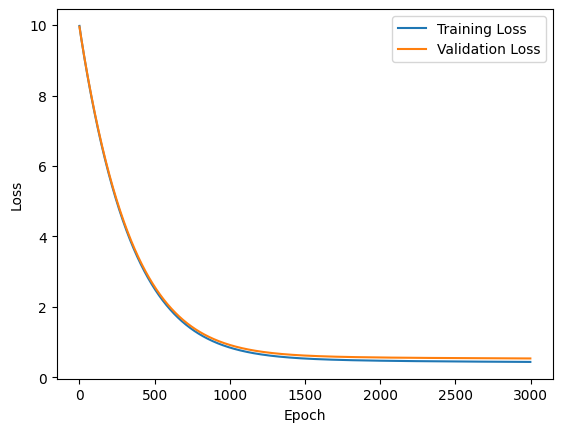

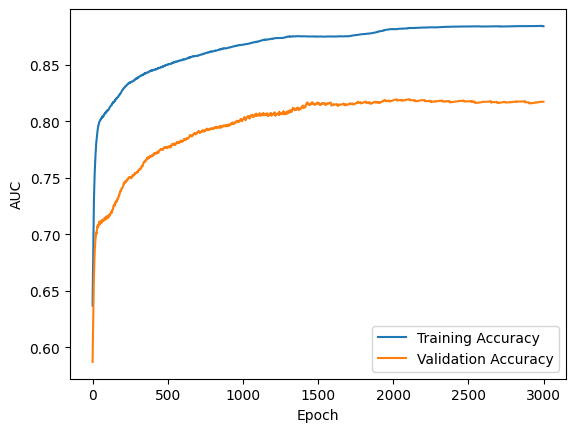

In [66]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['auc'], label='Training Accuracy')
plt.plot(history.history['val_auc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [69]:
dump(model, 'Best_model_ANN_alone_SIGMOID_28122023.joblib')

INFO:tensorflow:Assets written to: ram://56339cb1-7afb-4b8b-a419-a79493621ac1/assets


['Best_model_ANN_alone_SIGMOID_28122023.joblib']

In [48]:
model = load('Best_model_ANN_alone_SIGMOID_28122023.joblib')

In [ ]:
model = load('Best_model_ANN_alone_28122023.joblib')

### Modèle avec optimisation des hp

In [71]:
def create_model(hp):
    model = keras.Sequential([keras.Input(shape=(X.shape[1],)),
                              Dense(hp.Choice('dense_units1', [512, 1024, 2048, 4096]), activation=hp.Choice("activation1", ["elu","gelu","relu","selu"])),
                              Dense(hp.Choice('dense_units2', [512, 1024, 2048, 4096]), activation=hp.Choice("activation2", ["elu","gelu","relu","selu"])),
                              Dense(hp.Choice('dense_units3', [512, 1024, 2048, 4096]), activation=hp.Choice("activation3", ["elu","gelu","relu","selu"])),                              
    #model = Dropout(rate=hp.Choice('dropout1', values=[0.0, 0.2, 0.5, 0.8]))(model)
    #model = Dense(hp.Choice('dense_units12', [512, 1024, 2048, 4096]), activation=hp.Choice("activation2", ["elu","gelu","relu","selu"]))(model)
    #model = Dropout(rate=hp.Choice('dropout2', values=[0.0, 0.2, 0.5, 0.8]))(model)
                              Dense(5, activation='sigmoid')])
    #predictions = Dense(1, activation='sigmoid')(model)
    #model = Model(inputs=base_model.input, outputs=predictions,)
    #model.summary()
    metrics = [BinaryAccuracy(),Precision(name='precision'),Recall(name='recall'),AUC()] #F1Score()
    
    #model.summary(
    optimizer=hp.Choice('optimizer',[True,False])
    if optimizer:
        opt=Adam(learning_rate=1e-4)
    else:
        opt=SGD(learning_rate=1e-4)
        
    model.compile(optimizer=opt,loss='BinaryCrossentropy', metrics = metrics)
    
    return model

#tuner = keras_tuner.RandomSearch(
#    create_model,
#    objective='val_binary_accuracy', #loss
#    max_trials=101)

#tuner.search(train_X, train_y, epochs=50, validation_data=(validation_X, validation_y)) #augmenter epoch à l'avenir

tuner = keras_tuner.RandomSearch(
    create_model,
    objective='val_binary_accuracy', #loss
    max_trials=300)

tuner.search(X_train, y_train, epochs=4000, batch_size=len(y_train), validation_data=(X_test, y_test))

Trial 300 Complete [00h 01m 31s]
val_binary_accuracy: 0.746874988079071

Best val_binary_accuracy So Far: 0.840624988079071
Total elapsed time: 07h 42m 24s


In [72]:
best_model = tuner.get_best_models()[0]
best_model.summary()
best_hp=tuner.get_best_hyperparameters()[0]
print(best_hp.values)

print(best_model.history)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              8192      
                                                                 
 dense_1 (Dense)             (None, 4096)              8392704   
                                                                 
 dense_2 (Dense)             (None, 512)               2097664   
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 10,501,125
Trainable params: 10,501,125
Non-trainable params: 0
_________________________________________________________________
{'dense_units1': 2048, 'activation1': 'elu', 'dense_units2': 4096, 'activation2': 'elu', 'dense_units3': 512, 'activation3': 'gelu', 'optimizer': 1}
None


In [73]:
dump(best_model, 'Best_model_hpchoice_03012023.joblib')

INFO:tensorflow:Assets written to: ram://be3e6a7c-9ae0-49a5-a410-4e9d09357872/assets


['Best_model_hpchoice_03012023.joblib']

In [91]:
best_model = load('Best_model_hpchoice_03012023.joblib')

In [92]:
preds = best_model.predict(X)

10/10 [==============================] - 0s 725us/step


In [93]:
preds.shape

(318, 5)

In [55]:
preds

array([[2.5426038e-04, 1.0000000e+00, 3.2237318e-04, 1.0000000e+00,
        2.1813854e-03],
       [7.1259791e-01, 1.0000000e+00, 5.0914347e-01, 1.0000000e+00,
        8.2303894e-01],
       [9.9189502e-01, 1.0000000e+00, 9.9484295e-01, 9.9640828e-01,
        9.9210608e-01],
       ...,
       [2.1167707e-02, 1.0000000e+00, 1.3377201e-03, 9.9889153e-01,
        5.9825547e-02],
       [9.9911064e-01, 1.0000000e+00, 9.8857468e-01, 1.0000000e+00,
        7.6511586e-01],
       [9.9817133e-01, 1.0000000e+00, 9.9871290e-01, 1.0000000e+00,
        4.4624275e-01]], dtype=float32)

In [81]:
Y = load('Y.joblib')

In [94]:
y = np.concatenate((Y['Class_2.5/2.5'], Y['Class_3/3'], Y['Class_3/2'], Y['Class_2/3'], Y['Class_2/2.5']))
yhat = np.concatenate((preds[:,0], preds[:,1], preds[:,2], preds[:,3], preds[:,4]))

In [95]:
yhat.shape

(1590,)

Best Threshold=0.535858, G-Mean=0.947
AUC=0.959694


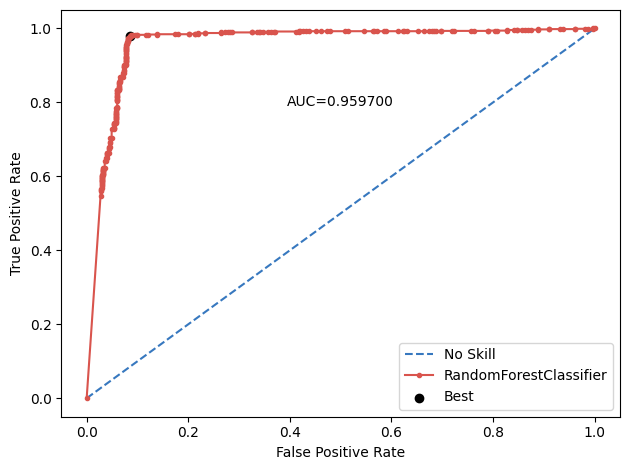

In [96]:
#y = Y
#y = y[:,1]
#yhat = best_model.predict(X)
#yhat = yhat[:,1]

from numpy import argmax
from numpy import sqrt

#yhat = model_rfc.predict_proba(X)
# keep probabilities for the positive outcome only
#yhat = yhat[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
auc = roc_auc_score(y, yhat)
print('AUC=%f' %auc)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='RandomForestClassifier')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.text(0.5,0.8,'AUC=%f' %round(auc,4) ,horizontalalignment='center',
     verticalalignment='center', fontsize=10, color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.tight_layout()

plt.savefig("DL multi class", dpi=400)
plt.show()

In [97]:
threshold = 0.535858

In [98]:
pred_seuil = np.transpose(np.where(yhat>threshold,1,0))
print(pred_seuil)
print(y)
print(*pred_seuil)
print(*(pred_seuil-y))
print(np.sum((pred_seuil-y)==np.zeros(pred_seuil.shape))," bien classées avec seuil = ", threshold, "sur ", pred_seuil.shape[0])

[0 1 1 ... 0 1 0]
[0 1 1 ... 0 1 1]
0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

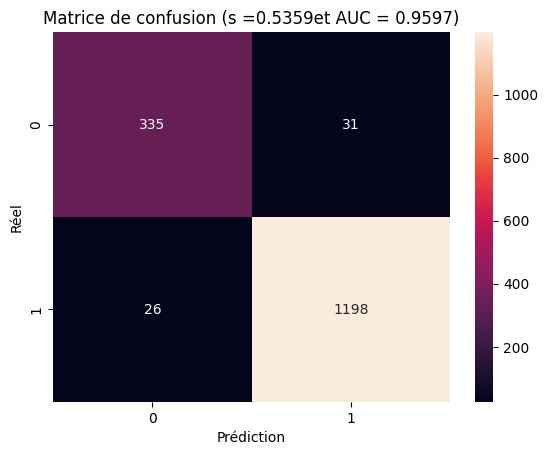

In [99]:
conf_matrix_SGD_01 = tensorflow.math.confusion_matrix(labels=y, predictions=np.transpose(pred_seuil))
ax_sgd_01 = sns.heatmap(conf_matrix_SGD_01, annot = True, fmt='d')
ax_sgd_01.set_title('Matrice de confusion (s =' + str(round(threshold,4)) + 'et AUC = ' + str(round(auc,4))+")")
ax_sgd_01.set_ylabel('Réel')
ax_sgd_01.set_xlabel('Prédiction')
plt.savefig("Matrice de confusion Deep Learning multiclass SAS BA BI", dpi=400)
plt.show()

In [100]:
TP = 335
TN = 1198
FP = 26
FN = 31
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print("sensitivity = " + str(sensitivity))
print("specificity = " + str(specificity))

sensitivity = 0.9153005464480874
specificity = 0.9787581699346405
